Here's an outline of the project:

Download the dataset

Explore & analyze the dataset

Prepare the dataset for ML training

Train hardcoded & baseline models

Make predictions & submit to Kaggle

Peform feature engineering

Train & evaluate different models

Tune hyperparameters for the best models

Train on a GPU with the entire dataset

Document & publish the project online





# Downloading the dataset

In [1]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

In [3]:
data_url='https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process'

In [4]:
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aswinramanathan
Your Kaggle Key: ··········


100%|██████████| 50.9M/50.9M [00:02<00:00, 24.3MB/s]


In [5]:
data_dir='quality-prediction-in-a-mining-process'

# Opening and viewing the dataset


In [6]:
!ls -lh {data_dir}

total 176M
-rw-r--r-- 1 root root 176M Jul 15 14:13 MiningProcess_Flotation_Plant_Database.csv


In [7]:
!head {data_dir}/MiningProcess_Flotation_Plant_Database.csv

date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2017-03-10

In [8]:
cols='date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate'.split(',')
cols

['date',
 '% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate']

In [9]:
len(cols)

24

So the given data set has 24 columns

We may not need all of these columns in the first iteration of building the model

Let us take the necessary columns along each way

In [10]:
!wc -l {data_dir}/MiningProcess_Flotation_Plant_Database.csv

737454 quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv


There are nearly 74 thousand rows in the given dataset


In [11]:
!head {data_dir}/MiningProcess_Flotation_Plant_Database.csv

date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2017-03-10

# Using pandas to read the dataset

In [12]:
import pandas as pd

In [13]:
cols

['date',
 '% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate']

In [14]:
need_cols=('% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate')

In [15]:
need_cols


('% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate')

We have ignored the date field in the gievn dataset for the first iteration because the date of extraction will not have that much of an effect on the output quality

Besides, porcessing dates is resource-intensive. So let us take care of that in other iterations if needed.

In [16]:
data_types_cols={
    '% Iron Feed':'float32',
 '% Silica Feed':'float32',
 'Starch Flow':'float32',
 'Amina Flow':'float32',
 'Ore Pulp Flow':'float32',
 'Ore Pulp pH':'float32',
 'Ore Pulp Density':'float32',
 'Flotation Column 01 Air Flow':'float32',
 'Flotation Column 02 Air Flow':'float32',
 'Flotation Column 03 Air Flow':'float32',
 'Flotation Column 04 Air Flow':'float32',
 'Flotation Column 05 Air Flow':'float32',
 'Flotation Column 06 Air Flow':'float32',
 'Flotation Column 07 Air Flow':'float32',
 'Flotation Column 01 Level':'float32',
 'Flotation Column 02 Level':'float32',
 'Flotation Column 03 Level':'float32',
 'Flotation Column 04 Level':'float32',
 'Flotation Column 05 Level':'float32',
 'Flotation Column 06 Level':'float32',
 'Flotation Column 07 Level':'float32',
 '% Iron Concentrate':'float32',
 '% Silica Concentrate':'float32'
    
}

In [17]:
data_types_cols

{'% Iron Concentrate': 'float32',
 '% Iron Feed': 'float32',
 '% Silica Concentrate': 'float32',
 '% Silica Feed': 'float32',
 'Amina Flow': 'float32',
 'Flotation Column 01 Air Flow': 'float32',
 'Flotation Column 01 Level': 'float32',
 'Flotation Column 02 Air Flow': 'float32',
 'Flotation Column 02 Level': 'float32',
 'Flotation Column 03 Air Flow': 'float32',
 'Flotation Column 03 Level': 'float32',
 'Flotation Column 04 Air Flow': 'float32',
 'Flotation Column 04 Level': 'float32',
 'Flotation Column 05 Air Flow': 'float32',
 'Flotation Column 05 Level': 'float32',
 'Flotation Column 06 Air Flow': 'float32',
 'Flotation Column 06 Level': 'float32',
 'Flotation Column 07 Air Flow': 'float32',
 'Flotation Column 07 Level': 'float32',
 'Ore Pulp Density': 'float32',
 'Ore Pulp Flow': 'float32',
 'Ore Pulp pH': 'float32',
 'Starch Flow': 'float32'}

In [18]:

# df=pd.read_csv("/content/quality/MiningProcess_Flotation_Plant_Database.csv",usecols=need_cols,dtype=data_dir)
df=pd.read_csv("/content/quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv",usecols=[x for x in range(0,24)])

In [19]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [20]:
df.shape

(737453, 24)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

We don't need the date column because the date is not related to the outcome of the ore

Let us drop the date field

In [22]:
df.drop(['date'],axis=1,inplace=True)

The columns are not of float data type

Let us convert them into float data type

In [23]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [24]:
for i in list(df.columns):
    df[i]=df[i].str.replace(',','.')

We have converted the commas in each value to a decimal point because without this pandas won't be able to transform object to float32

In [25]:
for i in list(df.columns):
    df[i]=df[i].astype('float32')

# EDA for whole dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float32
 1   % Silica Feed                 737453 non-null  float32
 2   Starch Flow                   737453 non-null  float32
 3   Amina Flow                    737453 non-null  float32
 4   Ore Pulp Flow                 737453 non-null  float32
 5   Ore Pulp pH                   737453 non-null  float32
 6   Ore Pulp Density              737453 non-null  float32
 7   Flotation Column 01 Air Flow  737453 non-null  float32
 8   Flotation Column 02 Air Flow  737453 non-null  float32
 9   Flotation Column 03 Air Flow  737453 non-null  float32
 10  Flotation Column 04 Air Flow  737453 non-null  float32
 11  Flotation Column 05 Air Flow  737453 non-null  float32
 12  Flotation Column 06 Air Flow  737453 non-nul

In [27]:
df.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

So there are no null values

In [28]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294743,14.651719,2869.140381,488.144653,397.578400,9.767639,1.680380,280.151886,277.159973,281.082489,...,290.754883,520.244812,522.649597,531.352661,420.320984,425.251648,429.941040,421.021271,65.050049,2.326763
std,5.157743,6.807439,1215.203735,91.230537,9.699785,0.387007,0.069249,29.621286,30.149357,28.558270,...,28.670105,131.014923,128.165054,150.842163,91.794434,84.535820,89.862228,84.891495,1.118645,1.125554
min,42.740002,1.310000,0.002026,241.669006,376.248993,8.753340,1.519820,175.509995,175.156006,176.468994,...,185.962006,149.218002,210.751999,126.254997,162.201004,166.990997,155.841003,175.348999,62.049999,0.600000
25%,52.669998,8.940000,2076.320068,431.795990,394.264008,9.527360,1.647310,250.281006,250.457001,250.854996,...,256.302002,416.977997,441.882996,411.325012,356.678986,357.653015,358.497009,356.772003,64.370003,1.440000
50%,56.080002,13.850000,3018.429932,504.393005,399.248993,9.798100,1.697600,299.343994,296.222992,298.696014,...,299.010986,491.877991,495.955994,494.317993,411.973999,408.773010,424.664581,411.065002,65.209999,2.000000
75%,59.720001,19.600000,3727.729980,553.257019,402.967987,10.038000,1.728330,300.148987,300.690002,300.381989,...,301.903992,594.114014,595.463989,601.249023,485.549011,484.329010,492.683990,476.464996,65.860001,3.010000
max,65.779999,33.400002,6300.229980,739.538025,418.640991,10.808100,1.853250,373.871002,375.992004,364.346008,...,371.592987,862.273987,828.919006,886.822021,680.359009,675.643982,698.861023,659.901978,68.010002,5.530000


In [29]:
df.head(20)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.200001,16.98,3019.530029,557.434021,395.713013,10.0664,1.74,249.214005,253.235001,250.576004,...,250.884003,457.395996,432.962006,424.954010,443.558014,502.255005,446.369995,523.343994,66.910004,1.31
1,55.200001,16.98,3024.409912,563.965027,397.382996,10.0672,1.74,249.718994,250.531998,250.862000,...,248.994003,451.890991,429.559998,432.938995,448.085999,496.363007,445.921997,498.075012,66.910004,1.31
2,55.200001,16.98,3043.459961,568.054016,399.667999,10.0680,1.74,249.740997,247.873993,250.313004,...,248.070999,451.239990,468.927002,434.609985,449.687988,484.411011,447.825989,458.566986,66.910004,1.31
3,55.200001,16.98,3047.360107,568.664978,397.938995,10.0689,1.74,249.917007,254.487000,250.048996,...,251.147003,452.441010,458.165009,442.864990,446.209991,471.411011,437.690002,427.669006,66.910004,1.31
4,55.200001,16.98,3033.689941,558.166992,400.253998,10.0697,1.74,250.203003,252.136002,249.895004,...,248.927994,452.441010,452.899994,450.523010,453.670013,462.597992,443.682007,425.678986,66.910004,1.31
5,55.200001,16.98,3079.100098,564.697021,396.532990,10.0705,1.74,250.729996,248.906006,249.520996,...,251.873001,444.384003,443.269012,460.449005,439.920013,451.588013,433.539001,425.458008,66.910004,1.31
6,55.200001,16.98,3127.790039,566.466980,392.899994,10.0713,1.74,250.313004,252.201996,249.082001,...,253.477005,446.184998,444.571014,452.306000,431.328003,443.548004,444.575012,431.251007,66.910004,1.31
7,55.200001,16.98,3152.929932,558.776978,397.002014,10.0722,1.74,249.895004,253.630005,249.257996,...,253.345001,445.984985,461.341003,461.640015,442.066986,441.730011,461.769989,449.678986,66.910004,1.31
8,55.200001,16.98,3147.270020,556.030029,394.307007,10.0730,1.74,250.136993,251.104004,248.774002,...,250.884003,446.686005,478.385010,459.102997,455.074005,439.798004,457.738007,455.915009,66.910004,1.31
9,55.200001,16.98,3142.580078,565.856995,393.105011,10.0738,1.74,249.653000,252.201996,248.203003,...,248.136993,445.684998,478.778992,460.665009,457.225006,453.235992,449.898010,455.750000,66.910004,1.31


In [30]:
from google.colab import files

df.to_csv('processed_df.csv', encoding = 'utf-8-sig') 
files.download('processed_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

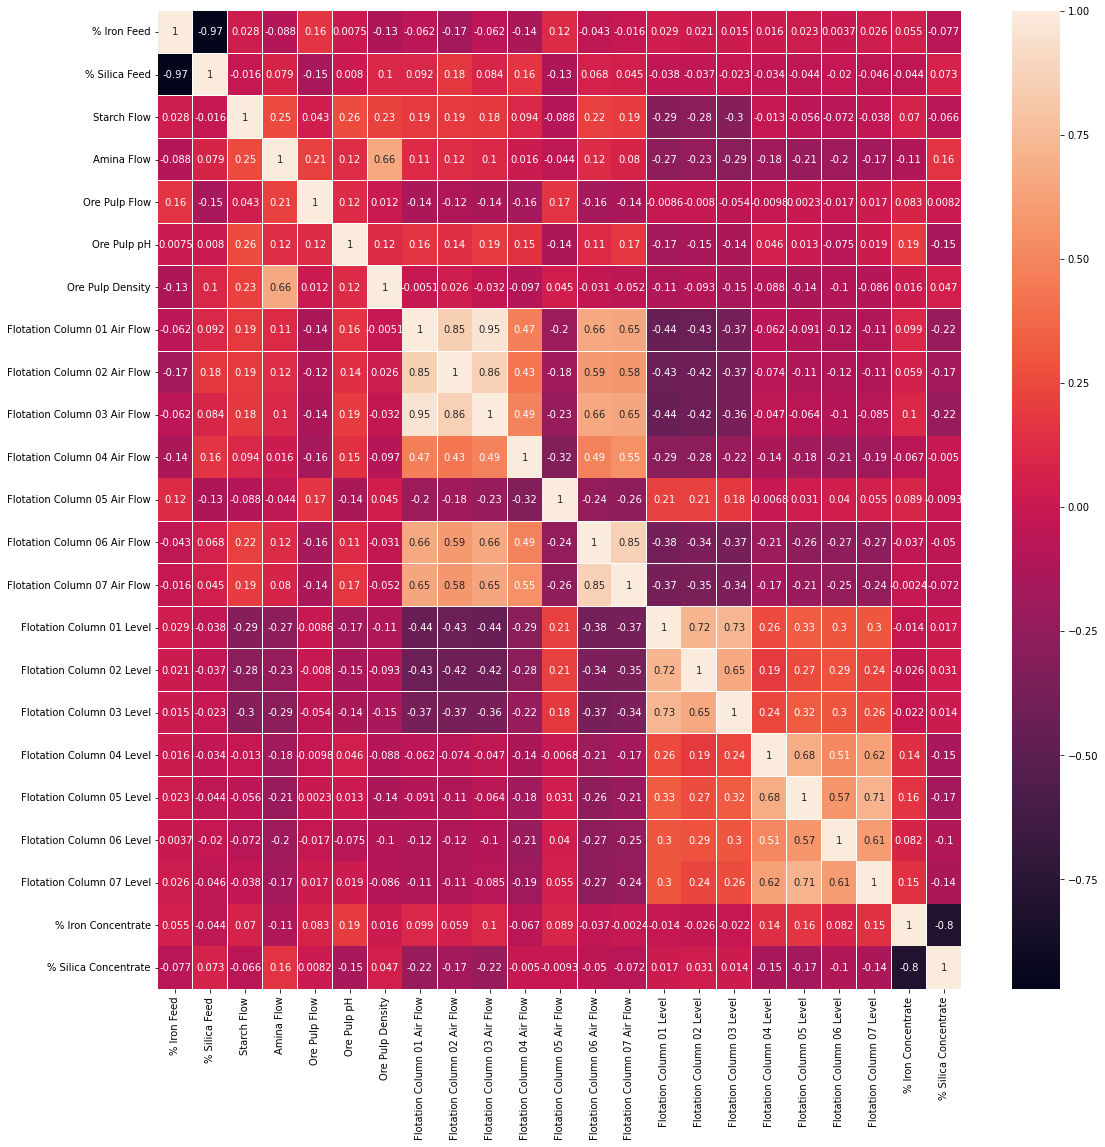

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),linewidths=0.003,linecolor='white',annot=True)

# Splitting the dataset into training set and test set

The given dataset does not have pre defined test and training sets.

Let us split the given data set into 2 parts

In [32]:
y=df['% Silica Concentrate']
x=df.drop(['% Silica Concentrate'],axis=1)

In [33]:
x.shape, y.shape

((737453, 22), (737453,))

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float32
 1   % Silica Feed                 737453 non-null  float32
 2   Starch Flow                   737453 non-null  float32
 3   Amina Flow                    737453 non-null  float32
 4   Ore Pulp Flow                 737453 non-null  float32
 5   Ore Pulp pH                   737453 non-null  float32
 6   Ore Pulp Density              737453 non-null  float32
 7   Flotation Column 01 Air Flow  737453 non-null  float32
 8   Flotation Column 02 Air Flow  737453 non-null  float32
 9   Flotation Column 03 Air Flow  737453 non-null  float32
 10  Flotation Column 04 Air Flow  737453 non-null  float32
 11  Flotation Column 05 Air Flow  737453 non-null  float32
 12  Flotation Column 06 Air Flow  737453 non-nul

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.3)

In [36]:
x_train.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
476790,53.790001,16.570000,2921.879883,536.770020,397.878998,9.88267,1.742690,302.738007,298.938995,299.903992,...,290.165985,287.385986,610.487000,540.112000,588.182983,506.923004,483.802002,460.888000,506.575989,66.169998
134350,55.169998,14.350000,2454.570068,522.664978,397.476990,9.17094,1.704420,249.828995,251.378998,251.024994,...,250.207993,250.475998,792.468018,610.304016,595.213989,427.623993,423.704987,499.920013,431.903992,62.820812
377463,48.820000,22.320000,3623.679932,526.872009,401.290985,9.96612,1.642500,298.860992,299.839996,302.028015,...,304.122009,298.554993,390.894012,424.781006,405.742004,461.632996,446.489014,460.066986,456.460999,64.250000
43833,56.730000,12.730000,2242.520020,567.627014,398.678009,9.56761,1.774490,200.339996,200.352005,200.636002,...,252.505005,248.574997,796.690979,809.661987,808.786987,424.377991,456.598999,390.782990,462.500000,65.489998
391386,52.669998,17.879999,1168.262085,259.621796,402.541473,9.22478,1.519943,299.393005,308.968994,301.024994,...,297.949005,295.657990,321.213776,740.423523,872.940002,642.797668,650.102600,624.150330,312.456970,64.989998


In [37]:
y_train.head()

476790    1.000000
134350    5.229075
377463    2.320000
43833     2.530000
391386    2.400000
Name: % Silica Concentrate, dtype: float32

# EDA for specific columns of interest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b86239ad0>,
      dtype=object)

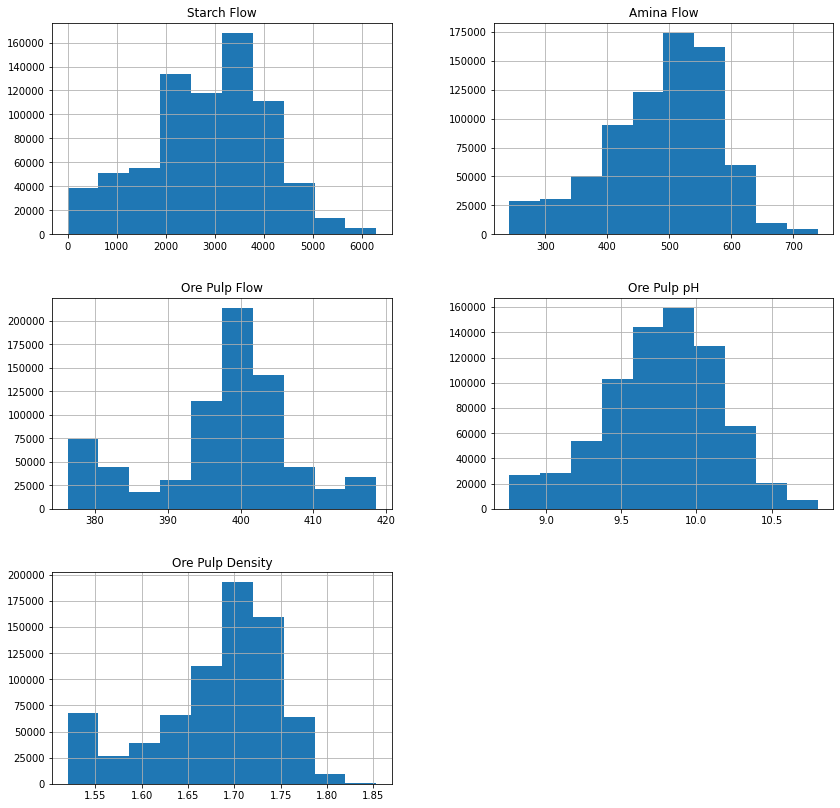

In [38]:
# fig=plt.figure(figsize=(30,30))
df.hist(column=['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density'],grid=True,figsize=(14,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b7612cd10>,
      dtype=object)

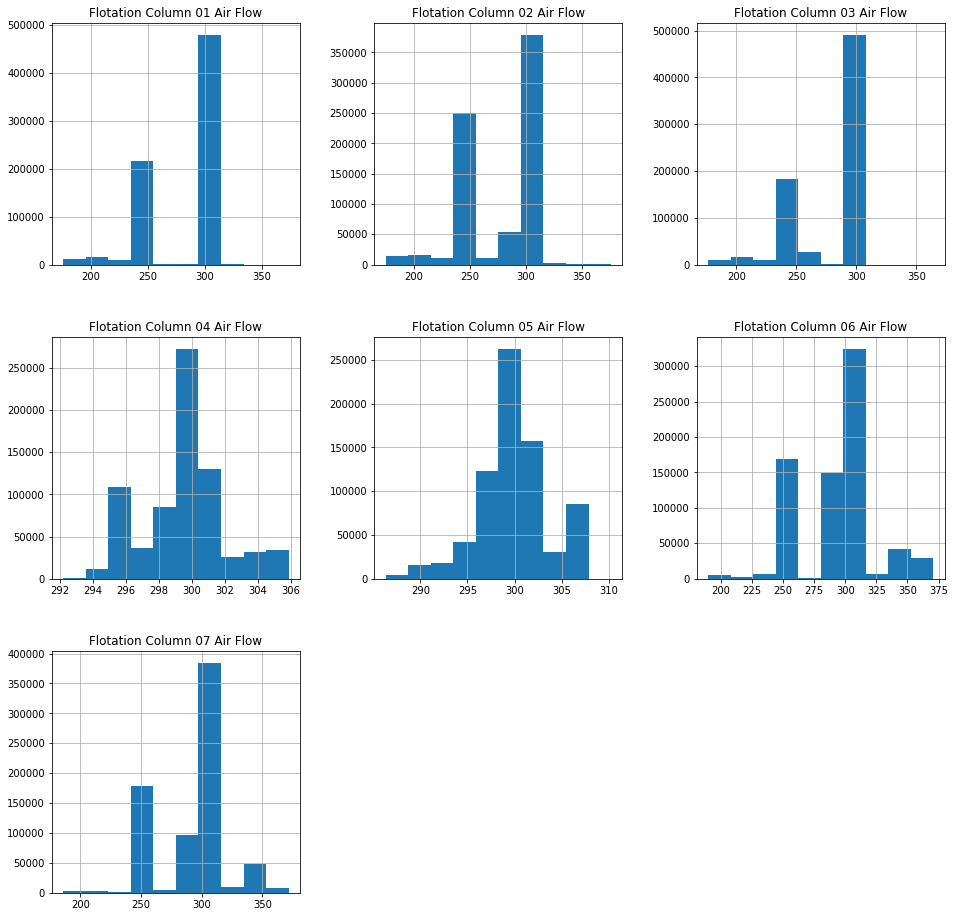

In [39]:
df.hist(column=['Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',],grid=True,figsize=(16,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b832b27d0>,
      dtype=object)

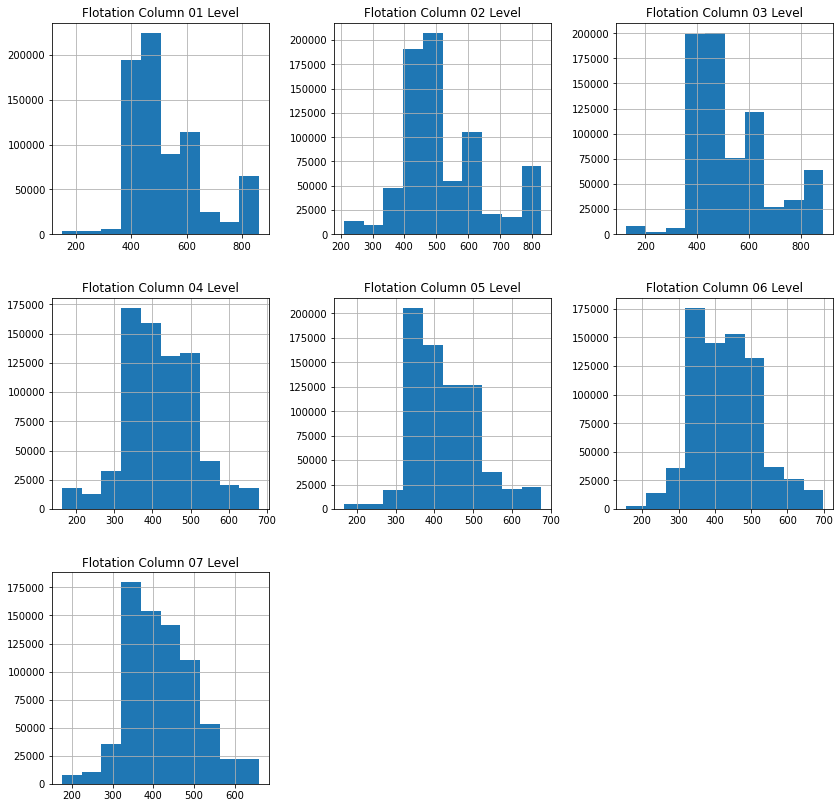

In [40]:
df.hist(column=['Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level'],grid=True,figsize=(14,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b8ac0d7d0>,
      dtype=object)

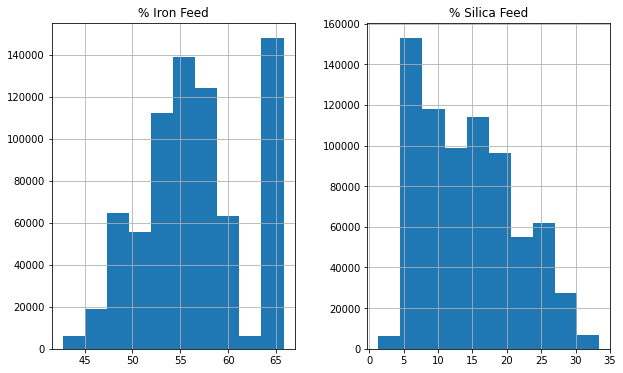

In [41]:
df.hist(column=['% Iron Feed', '% Silica Feed'],grid=True,figsize=(10,6))

# Creating a baseline model

Let us use a dummy regressor to create a baseline model to see if machine learning can even solve this problem

In [42]:
from sklearn.dummy import DummyRegressor

In [43]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

DummyRegressor()

In [44]:
y_preds=dummy_regr.predict(x_test)

Now that we have made a prediction using the dummy regressor, let us evaluate its performance

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(y_test, y_preds, squared=False)
#setting squared to false returns RMSE

1.1251208

In [47]:
mean_squared_error(y_test, y_preds, squared=True)
#this is just the square of the RMSE value

1.2658968

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mean_absolute_error(y_test, y_preds)

0.9162111

The baseline model we chose is the dummy regressor which returns predictions as the mean of all values

This baseline model has been able to achieve a RMSE of 1.1251 and an MAE of 0.9162

We have to build models that perform better than this

# Creating a linear regressor

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [52]:
reg_model.coef_

array([ 2.6332591e-02,  2.9345823e-02, -1.7380342e-05,  6.8139518e-04,
        4.2627598e-03,  4.5710240e-02,  1.6998844e-01, -5.1549920e-03,
       -1.4805323e-03, -9.2085672e-04,  2.1023550e-03,  1.4536972e-02,
       -8.4214145e-05,  1.2617982e-03, -2.8416654e-04, -1.6036374e-04,
       -8.5281907e-05, -1.2025214e-04, -1.8532062e-04, -2.1128973e-04,
        1.9448623e-04, -7.8705525e-01], dtype=float32)

These are the coefficients for all variables in the linear regression model

In [53]:
train_reg_pred=reg_model.predict(x_train)

In [54]:
mean_squared_error(y_train,train_reg_pred,squared=False)

0.6368067

In [55]:
mean_absolute_error(y_train, train_reg_pred)

0.49193692

The model doesn't seem to overfit the training data

In [56]:
reg_pred=reg_model.predict(x_test)

In [57]:
reg_pred

array([1.6913567, 2.5474129, 1.9922333, ..., 2.0815544, 3.3916206,
       1.602642 ], dtype=float32)

In [58]:
mean_squared_error(y_test, reg_pred, squared=False)
#setting squared to false returns RMSE

0.6385002

In [59]:
mean_absolute_error(y_test, reg_pred)

0.49312726

This simple linear regression model has been able to achieve a RMSE of 0.6385 and an MAE of 0.4931

This is a drastic increase in performance from the baseline model. So we can say that this problem can be solved by machine learning

# Creating a Ridge Regression Model

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge1 = Ridge(alpha=1.0)

In [62]:
ridge1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34062e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [63]:
ridge1_pred=ridge1.predict(x_test)

In [64]:
ridge1_pred

array([1.6913414, 2.5474052, 1.9922447, ..., 2.0815315, 3.3916245,
       1.602642 ], dtype=float32)

In [65]:
mean_squared_error(y_test, ridge1_pred, squared=False)

0.63850015

In [66]:
mean_absolute_error(y_test, ridge1_pred)

0.4931273

The ridge regression model with regularization parameter as 1 performs slightly better than the linear regression model without regularization

Let us repeat this with regularization parameter as 5

In [67]:
ridge2=Ridge(alpha=3.0)

In [68]:
ridge2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34283e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=3.0)

In [69]:
ridge2_pred=ridge2.predict(x_test)

In [70]:
ridge2_pred

array([1.6913147, 2.547371 , 1.9922829, ..., 2.0815582, 3.3916206,
       1.6026497], dtype=float32)

In [71]:
mean_squared_error(y_test, ridge2_pred, squared=False)

0.63850015

In [72]:
mean_absolute_error(y_test, ridge2_pred)

0.49312755

Let us try to make a new ridge regression model with regularization parameter as 50000. This should theoretically lead to underfit

In [73]:
ridge3=Ridge(alpha=50000.0)

In [74]:
ridge3.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.6863e-08): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=50000.0)

In [75]:
ridge3_pred=ridge3.predict(x_test)
ridge3_pred

array([1.6601219, 2.4528809, 2.035839 , ..., 2.1065216, 3.2918663,
       1.6363564], dtype=float32)

In [76]:
mean_squared_error(y_test, ridge3_pred, squared=False)

0.6421053

In [77]:
mean_absolute_error(y_test, ridge3_pred)

0.49635273

As expected, the predictions begin to get worse and the RMSE and MAE start to shoot up. This is because the model is unnecessarily penalized

# Creating a Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor


In [81]:
# randFor = RandomForestRegressor(n_estimators=70,max_depth=10, random_state=55,max_features='log2')
randFor = RandomForestRegressor(n_estimators=10, random_state=55)

Trying to train the model on the entire training set and with n_estimators set to 50 is taking over 23 minutes even with GPU

So let us try to reduce the computational load by limiting n_estimators to 10 and use 50% of the training set

In [84]:
new_x_train, new_X_test, new_y_train, new_y_test = train_test_split( x_train, y_train, train_size=0.20, random_state=66)

In [85]:
new_x_train.shape

(103243, 22)

In [86]:
new_y_train.shape

(103243,)

In [87]:
randFor.fit(new_x_train,new_y_train)

RandomForestRegressor(n_estimators=10, random_state=55)

Now that we have trained a model with 20% of the training data it is essential that we save it for later use because training this model on a subset of the whole data itself takes us 20 seconds

In [88]:
import joblib

In [90]:
joblib.dump(randFor, "./random_forest.joblib")

['./random_forest.joblib']

In [91]:
rand1_pred=randFor.predict(x_test)
rand1_pred

array([1.19000006, 2.74999998, 1.63999999, ..., 2.20000005, 4.0227735 ,
       1.19000006])

In [92]:
mean_squared_error(y_test, rand1_pred, squared=False)

0.13328925829029278

In [93]:
mean_absolute_error(y_test, rand1_pred)

0.05810619248896467

Clearly, the random forest regressor outperforms all the previous models by a huge margin

This has been achieved with the bare minimum inputs

Let us try to refine the tree regressor in the upcoming iterations